In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif,chi2,mutual_info_classif


reading data from csv

In [2]:
data=pd.read_csv("C:/Users/anura/Downloads\WESAD (Raw and Processed)/dataset/2. final/datasets/hrv/wesad/combined/classification/wesad-chest-combined-classification-hrv.csv")

In [3]:
data.head(5)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,condition,SSSQ class,SSSQ Label,condition label
0,660.756625,657.242305,34.857082,7.408307,7.408129,4.705134,91.050077,1.75,0.00,5.244915,...,1.092856e+07,0.134410,0.249678,7.068440,0.033515,13,baseline,medium,1,0
1,762.004543,769.028815,106.035926,13.591780,13.580221,7.801475,80.267696,6.00,1.00,9.614723,...,-1.039564e+06,0.125816,0.067484,5.971604,0.003921,9,baseline,low,0,0
2,978.587122,973.028365,80.323113,20.318045,20.316451,3.953289,61.720802,20.50,1.50,14.383937,...,-3.073518e+06,0.069888,0.038281,10.945519,0.003154,4,amusement,medium,1,1
3,690.333891,669.548460,79.677822,15.173680,15.173087,5.251055,87.996270,8.75,1.50,10.742463,...,-4.341078e+06,0.094345,0.074014,2.435759,0.009692,8,stress,low,0,2
4,724.270331,721.597785,71.663062,13.580379,13.580370,5.276956,83.637107,5.00,0.75,9.614828,...,1.311140e+07,0.076385,0.063323,3.259253,0.014438,4,stress,medium,1,2


In [4]:
data.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,SSSQ Label,condition label
count,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000,...,1.356500e+05,135650.000000,1.356500e+05,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000,135650.000000
mean,788.515184,786.845673,71.453748,14.379418,14.376136,5.247878,80.203812,10.396622,1.026915,10.178226,...,1.357090e+00,8.904329,-1.761317e+06,0.166589,0.210475,8.309048,0.041303,9.398349,0.875245,0.773727
std,156.334847,160.113990,33.646350,6.134973,6.134411,1.792526,17.913204,10.857041,1.865541,4.343130,...,5.323943e+00,0.957470,1.070482e+09,0.207166,0.469279,14.892431,0.081219,4.709621,0.780052,0.882485
min,411.068840,411.966595,13.786706,2.294390,2.292144,1.887603,48.183943,0.000000,0.000000,1.622825,...,3.871992e-10,6.941465,-3.426834e+11,0.021295,0.008200,0.294702,0.000009,2.000000,0.000000,0.000000
25%,695.450860,689.389645,51.839395,9.579017,9.576334,4.025865,68.227916,2.000000,0.000000,6.779992,...,6.322669e-02,8.260019,-3.607337e+06,0.073939,0.048338,2.251744,0.005567,5.000000,0.000000,0.000000
50%,798.200622,797.564400,65.238376,13.578235,13.576345,5.028439,75.988575,6.500000,0.000000,9.611978,...,2.536286e-01,8.717143,-9.391674e+05,0.111455,0.092320,4.213662,0.014356,9.000000,1.000000,0.000000
75%,888.053029,892.774831,86.848219,18.170919,18.165098,6.001586,86.975168,15.500000,1.250000,12.860790,...,7.131422e-01,9.326048,3.286467e+06,0.184950,0.203164,8.530982,0.042999,14.000000,1.000000,2.000000
max,1341.611513,1181.686350,418.066612,34.881131,34.880732,22.194700,146.191044,46.750000,11.500000,24.695368,...,2.459810e+02,12.090949,1.092115e+11,4.771071,9.714187,537.538316,1.129262,17.000000,2.000000,2.000000


dividing data into X and Y variables

In [5]:
x=data.drop(['condition','SSSQ class','SSSQ Label','condition label','subject id'],axis='columns')
y=["condition"]
y=data[y]

Applyiing MinMaxScaler to normalaise the data

In [6]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [7]:
y.head()

,condition
0,baseline
1,baseline
2,amusement
3,stress
4,stress


converting qualitative data into qualtitaive data

In [8]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
y=la.fit_transform(y)

C:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature selection using SelectKBest with F_classif

In [9]:
x=SelectKBest(f_classif,k=20).fit_transform(x,y)

spliting into training and testing data 

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=30)

logistics Regression

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
ypred=clf.predict(x_test)


C:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,ypred)
accuracy


0.7512163477132663

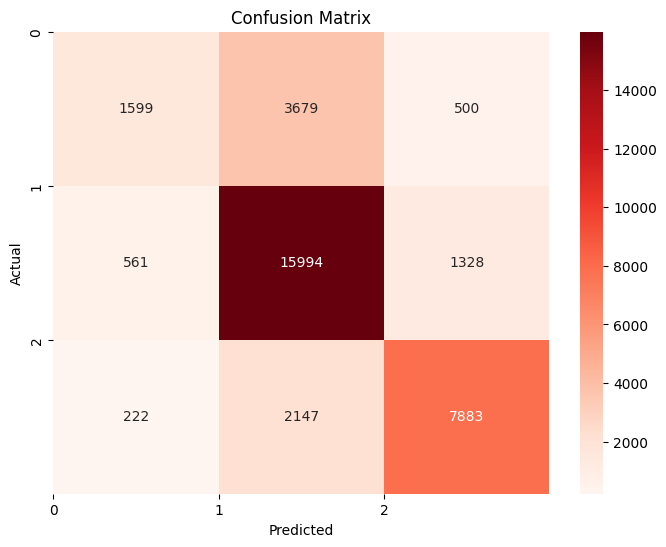

In [13]:
# Get the unique class labels from y_test and ypred
classes = np.unique(np.concatenate((y_test, ypred)))

# Create the confusion matrix
cm = confusion_matrix(y_test, ypred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=range(len(classes)), labels=classes)
plt.yticks(ticks=range(len(classes)), labels=classes)
plt.title('Confusion Matrix')
plt.show()


accuracy of logistic regression is 75.1216 %

Random forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(x_train,y_train)
ypred=clf.predict(x_test)

In [15]:
accuracy = accuracy_score(y_test,ypred)
accuracy

0.9997641022616696

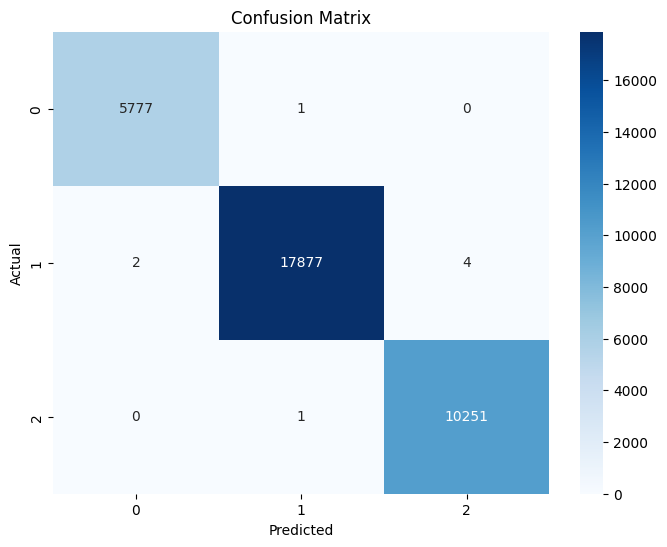

In [16]:
# Assuming y_test is the actual labels and ypred is the predicted labels
cm = confusion_matrix(y_test, ypred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


accuracy of Random forest is 99.9793 %

K-Nearest-neighbour


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
ypred = knn.predict(x_test)

In [18]:
accuracy = accuracy_score(y_test,ypred)
accuracy

0.9995576917406305

accuracy of K-Nearest-neighbour is 99.9557 %

artificial neural network


In [19]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation


# Create the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

# Train the model
history=model.fit(x_train, y_train, batch_size=32, epochs=30, validation_split=0.2)



Epoch 1/30
2544/2544 [==============================] - 11s 3ms/step - loss: 0.6416 - accuracy: 0.7259 - val_loss: 0.4943 - val_accuracy: 0.8011
Epoch 2/30
2544/2544 [==============================] - 8s 3ms/step - loss: 0.5152 - accuracy: 0.7858 - val_loss: 0.4350 - val_accuracy: 0.8233
Epoch 3/30
2544/2544 [==============================] - 8s 3ms/step - loss: 0.4757 - accuracy: 0.8040 - val_loss: 0.3852 - val_accuracy: 0.8425
Epoch 4/30
2544/2544 [==============================] - 8s 3ms/step - loss: 0.4486 - accuracy: 0.8159 - val_loss: 0.3506 - val_accuracy: 0.8691
Epoch 5/30
2544/2544 [==============================] - 8s 3ms/step - loss: 0.4336 - accuracy: 0.8232 - val_loss: 0.3342 - val_accuracy: 0.8685
Epoch 6/30
2544/2544 [==============================] - 8s 3ms/step - loss: 0.4187 - accuracy: 0.8294 - val_loss: 0.3423 - val_accuracy: 0.8617
Epoch 7/30
2544/2544 [==============================] - 8s 3ms/step - loss: 0.4111 - accuracy: 0.8327 - val_loss: 0.3218 - val_accuracy

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

1060/1060 [==============================] - 1s 797us/step - loss: 0.2307 - accuracy: 0.9041
Test loss: 0.23071083426475525
Test accuracy: 0.9040780663490295


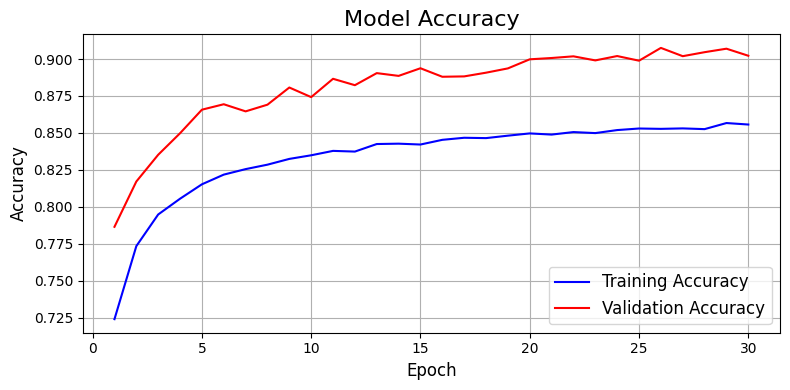

In [ ]:
# Get training and validation accuracy values
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

# validation_acc = history.history['val_accuracy']
epochs = range(1, len(training_acc) + 1)

# Create a plot with enhanced visual elements
plt.figure(figsize=(8, 4))
plt.plot(epochs, training_acc, 'b', label='Training Accuracy')
plt.plot(epochs, validation_acc, 'r', label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()

accuracy of ANN is 92.21%

In [ ]:
import tensorflow as tf


# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((20, 1), input_shape=(20,)),
    tf.keras.layers.Conv1D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='Nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=25, batch_size=16)



Epoch 1/25
6359/6359 [==============================] - 10s 1ms/step - loss: 0.5892 - accuracy: 0.7502
Epoch 2/25
6359/6359 [==============================] - 9s 1ms/step - loss: 0.4609 - accuracy: 0.8125
Epoch 3/25
6359/6359 [==============================] - 8s 1ms/step - loss: 0.3838 - accuracy: 0.8476
Epoch 4/25
6359/6359 [==============================] - 9s 1ms/step - loss: 0.3341 - accuracy: 0.8679
Epoch 5/25
6359/6359 [==============================] - 9s 1ms/step - loss: 0.2990 - accuracy: 0.8840
Epoch 6/25
6359/6359 [==============================] - 10s 2ms/step - loss: 0.2709 - accuracy: 0.8959
Epoch 7/25
6359/6359 [==============================] - 9s 1ms/step - loss: 0.2478 - accuracy: 0.9045
Epoch 8/25
6359/6359 [==============================] - 10s 2ms/step - loss: 0.2312 - accuracy: 0.9107
Epoch 9/25
6359/6359 [==============================] - 9s 1ms/step - loss: 0.2167 - accuracy: 0.9169
Epoch 10/25
6359/6359 [==============================] - 10s 2ms/step - loss: 0

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

1060/1060 [==============================] - 1s 971us/step - loss: 0.1205 - accuracy: 0.9507
Test loss: 0.12054970860481262, Test accuracy: 0.9506973624229431
